# Affect-YOLO Detailed Information

In [46]:
import os
import matplotlib.pyplot as plt

def analyze_yolo_dataset_total(dataset_path, dataset_name):
    emotions = ["Anger",
                "Contempt",
                "Disgust",
                "Fear",
                "Happy",
                "Neutral",
                "Sad",
                "Surprise"]

    emotion_counts = {emotion: 0 for emotion in emotions}

    txt_file_count = 0
    for root, _, files in os.walk(dataset_path):
        for file_name in files:
            if file_name.endswith('.txt'):
                txt_file_count += 1  
                txt_file_path = os.path.join(root, file_name)
                
                try:
                    with open(txt_file_path, 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            emotion_id = int(line.split()[0])
                            emotion = emotions[emotion_id]
                            emotion_counts[emotion] += 1
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")
                    continue

    for emotion, count in emotion_counts.items():
        print(f'{emotion}: {count} instances')

    print(f'Total number of txt files read: {txt_file_count}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    wedges, texts, autotexts = ax1.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax1.set_title(f'Distribution of Emotions in {dataset_name}', fontweight='bold', fontsize=17)
    ax1.axis('equal')  
    
    for text in texts + autotexts:
        text.set_fontsize(17)
        text.set_fontweight('bold')

    # pie chart
    bars = ax2.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
    ax2.set_xlabel('Emotions', fontweight='bold', fontsize=17)
    ax2.set_ylabel('Number of Instances', fontweight='bold', fontsize=17)
    ax2.set_title(f'Number of Instances for Each Emotion in {dataset_name}', fontweight='bold', fontsize=17)

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold', fontsize=17)

    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

    plt.show()



Anger: 3434 instances
Contempt: 2946 instances
Disgust: 3241 instances
Fear: 2961 instances
Happy: 3344 instances
Neutral: 2380 instances
Sad: 2795 instances
Surprise: 4161 instances
Total number of txt files read: 25262


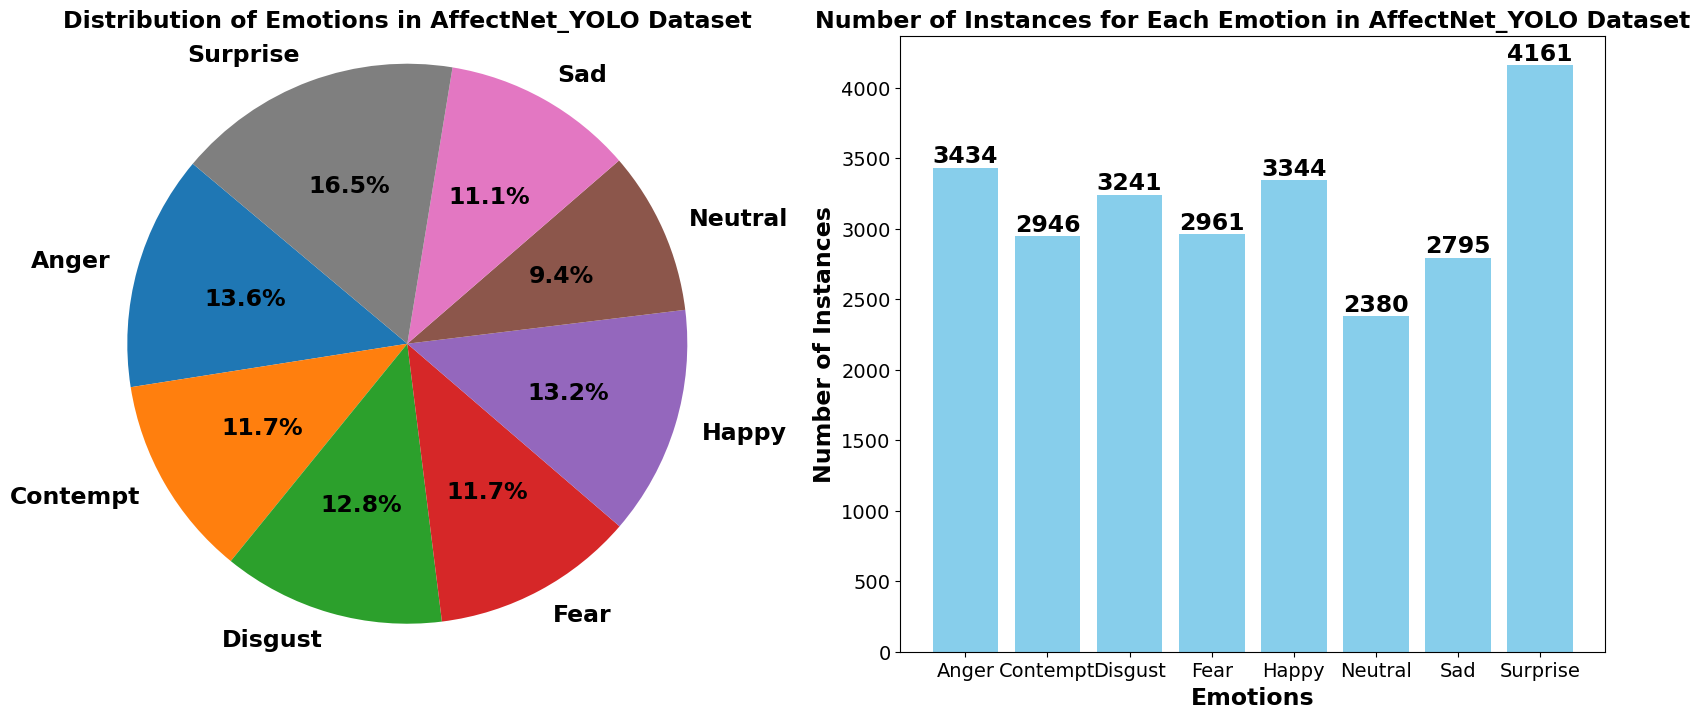

In [47]:
# TOTAL
dataset_path = '/Users/piglet/Desktop/Project_Code/Affect_YOLO'
dataset_name = 'AffectNet_YOLO Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

### Sample Output


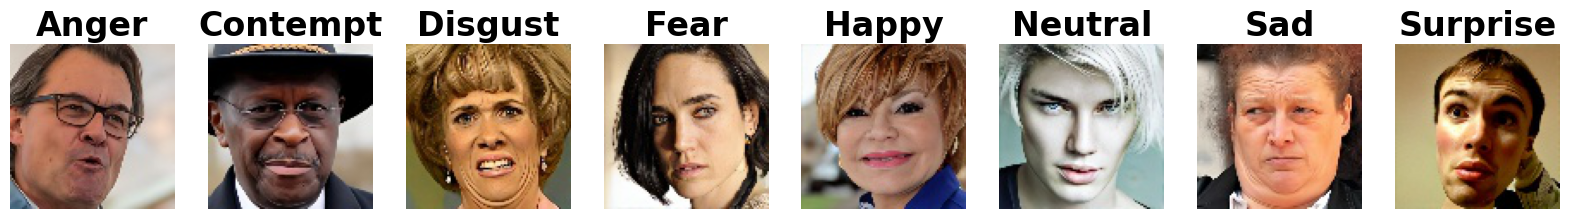

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/Users/piglet/Desktop/Project_Code/YOLO_format/train'
images_path = os.path.join(dataset_path, 'images')  
labels_path = os.path.join(dataset_path, 'labels')  

emotions = ["Anger", "Contempt", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

emotion_to_index = {emotion: i for i, emotion in enumerate(emotions)}

found_images = {emotion: None for emotion in emotions}

for label_file in os.listdir(labels_path):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_path, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                category_index = int(parts[0])
                for emotion, index in emotion_to_index.items():
                    if category_index == index and found_images[emotion] is None:
                        image_file = label_file.replace('.txt', '.jpg')
                        image_file_with_path = os.path.join(images_path, image_file)
                        if os.path.exists(image_file_with_path):
                            found_images[emotion] = image_file_with_path
                            break
            if all(found_images.values()):
                break

fig = plt.figure(figsize=(20, 10))
for i, (emotion, img_path) in enumerate(found_images.items()):
    if img_path is not None:
        img = Image.open(img_path)
        ax = fig.add_subplot(1, len(emotions), i + 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(emotion, fontsize=24, fontweight='bold')  

plt.show()


### Label schematic

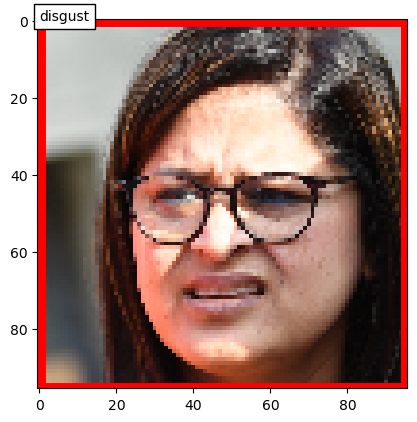

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

classes = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

image_path = r'/Users/piglet/Desktop/Project_Code/YOLO_format/train/images/ffhq_10.png'
img = Image.open(image_path)

label_path = r'/Users/piglet/Desktop/Project_Code/YOLO_format/train/labels/ffhq_10.txt'
with open(label_path, 'r') as f:
    labels = f.readlines()


fig, ax = plt.subplots(1)
ax.imshow(img)


width, height = img.size

for label in labels:
    parts = label.strip().split()
    class_id = int(parts[0])
    x_center = float(parts[1]) * width
    y_center = float(parts[2]) * height
    bbox_width = float(parts[3]) * width
    bbox_height = float(parts[4]) * height    
    xmin = x_center - bbox_width / 2
    ymin = y_center - bbox_height / 2
    rect = patches.Rectangle((xmin, ymin), bbox_width, bbox_height, linewidth=10, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(xmin, ymin, classes[class_id], bbox=dict(facecolor='white', alpha=1))

plt.show()


### Check whether the labels and images in the dataset are one-to-one

In [60]:
import os

def get_filenames(directory, extensions):
    return set(os.path.splitext(f)[0] for f in os.listdir(directory) if f.endswith(extensions))

def find_mismatched_files(image_dir, text_dir):

    image_files = get_filenames(image_dir, ('.jpg', '.jpeg', '.png'))
    text_files = get_filenames(text_dir, '.txt')
    
    images_without_texts = image_files - text_files
    texts_without_images = text_files - image_files
    
    return images_without_texts, texts_without_images

image_directory = '/Users/piglet/Desktop/Project_Code/YOLO_format/train/images'
text_directory = '/Users/piglet/Desktop/Project_Code/YOLO_format/train/labels'

images_without_texts, texts_without_images = find_mismatched_files(image_directory, text_directory)


if not images_without_texts and not texts_without_images:
    print("All images and txt files correspond one to one.")
else:
    if images_without_texts:
        print("The image without a corresponding txt file is:")
        for image in images_without_texts:
            print(image)

    if texts_without_images:
        print("\nThe txt file without a corresponding image is:")
        for text in texts_without_images:
            print(text)


All images and txt files correspond one to one.


### Display training set, validation set and test set information

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def analyze_yolo_dataset_multiple(paths, dataset_names):

    emotions = ["Anger",
                "Contempt",
                "Disgust",
                "Fear",
                "Happy",
                "Neutral",
                "Sad",
                "Surprise"]

    def get_emotion_counts(dataset_path):
        emotion_counts = {emotion: 0 for emotion in emotions}
        txt_file_count = 0

        for root, _, files in os.walk(dataset_path):
            for file_name in files:
                if file_name.endswith('.txt'):
                    txt_file_count += 1
                    txt_file_path = os.path.join(root, file_name)

                    try:
                        with open(txt_file_path, 'r') as file:
                            lines = file.readlines()

                            for line in lines:
                                emotion_id = int(line.split()[0])
                                emotion = emotions[emotion_id]
                                emotion_counts[emotion] += 1
                    except Exception as e:
                        print(f"Error reading file {file_name}: {e}")
                        continue

        return emotion_counts, txt_file_count

    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    emotion_data = []

    for i, (dataset_path, dataset_name) in enumerate(zip(paths, dataset_names)):
        emotion_counts, txt_file_count = get_emotion_counts(dataset_path)

        emotion_data.append(emotion_counts)

        wedges, texts, autotexts = axes[i].pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{dataset_name}', fontweight='bold', fontsize=36)
        axes[i].axis('equal')  

        for text in texts + autotexts:
            text.set_fontsize(22)
            text.set_fontweight('bold')

    emotion_df = pd.DataFrame(emotion_data, index=dataset_names)
    
    emotion_df['Total'] = emotion_df.sum(axis=1)

    print(emotion_df)

    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis('off')
    tbl = ax.table(cellText=emotion_df.values, colLabels=emotion_df.columns, rowLabels=emotion_df.index, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    for key, cell in tbl.get_celld().items():
        if key[0] == 0 or key[1] == -1:
            cell.set_text_props(fontweight='bold', fontsize=14)

    plt.show()

    # bar chart
    emotion_df = emotion_df.drop(columns=['Total'])  

    ax = emotion_df.T.plot(kind='bar', figsize=(15, 8), width=0.8, color=['skyblue', 'lightgreen', 'lightcoral'])

    plt.xlabel('Emotions', fontweight='bold', fontsize=17)
    plt.ylabel('Number of Instances', fontweight='bold', fontsize=17)
    plt.title('Number of Instances for Each Emotion Across Datasets', fontweight='bold', fontsize=17)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(title='Datasets', title_fontsize='13', fontsize='12')
    plt.show()




           Anger  Contempt  Disgust  Fear  Happy  Neutral   Sad  Surprise  \
Train set   2339      1996     2242  2021   2154     1616  1914      2819   
Valid set    712       618      672   622    791      514   603       874   
Test set     383       332      327   318    399      250   278       468   

           Total  
Train set  17101  
Valid set   5406  
Test set    2755  


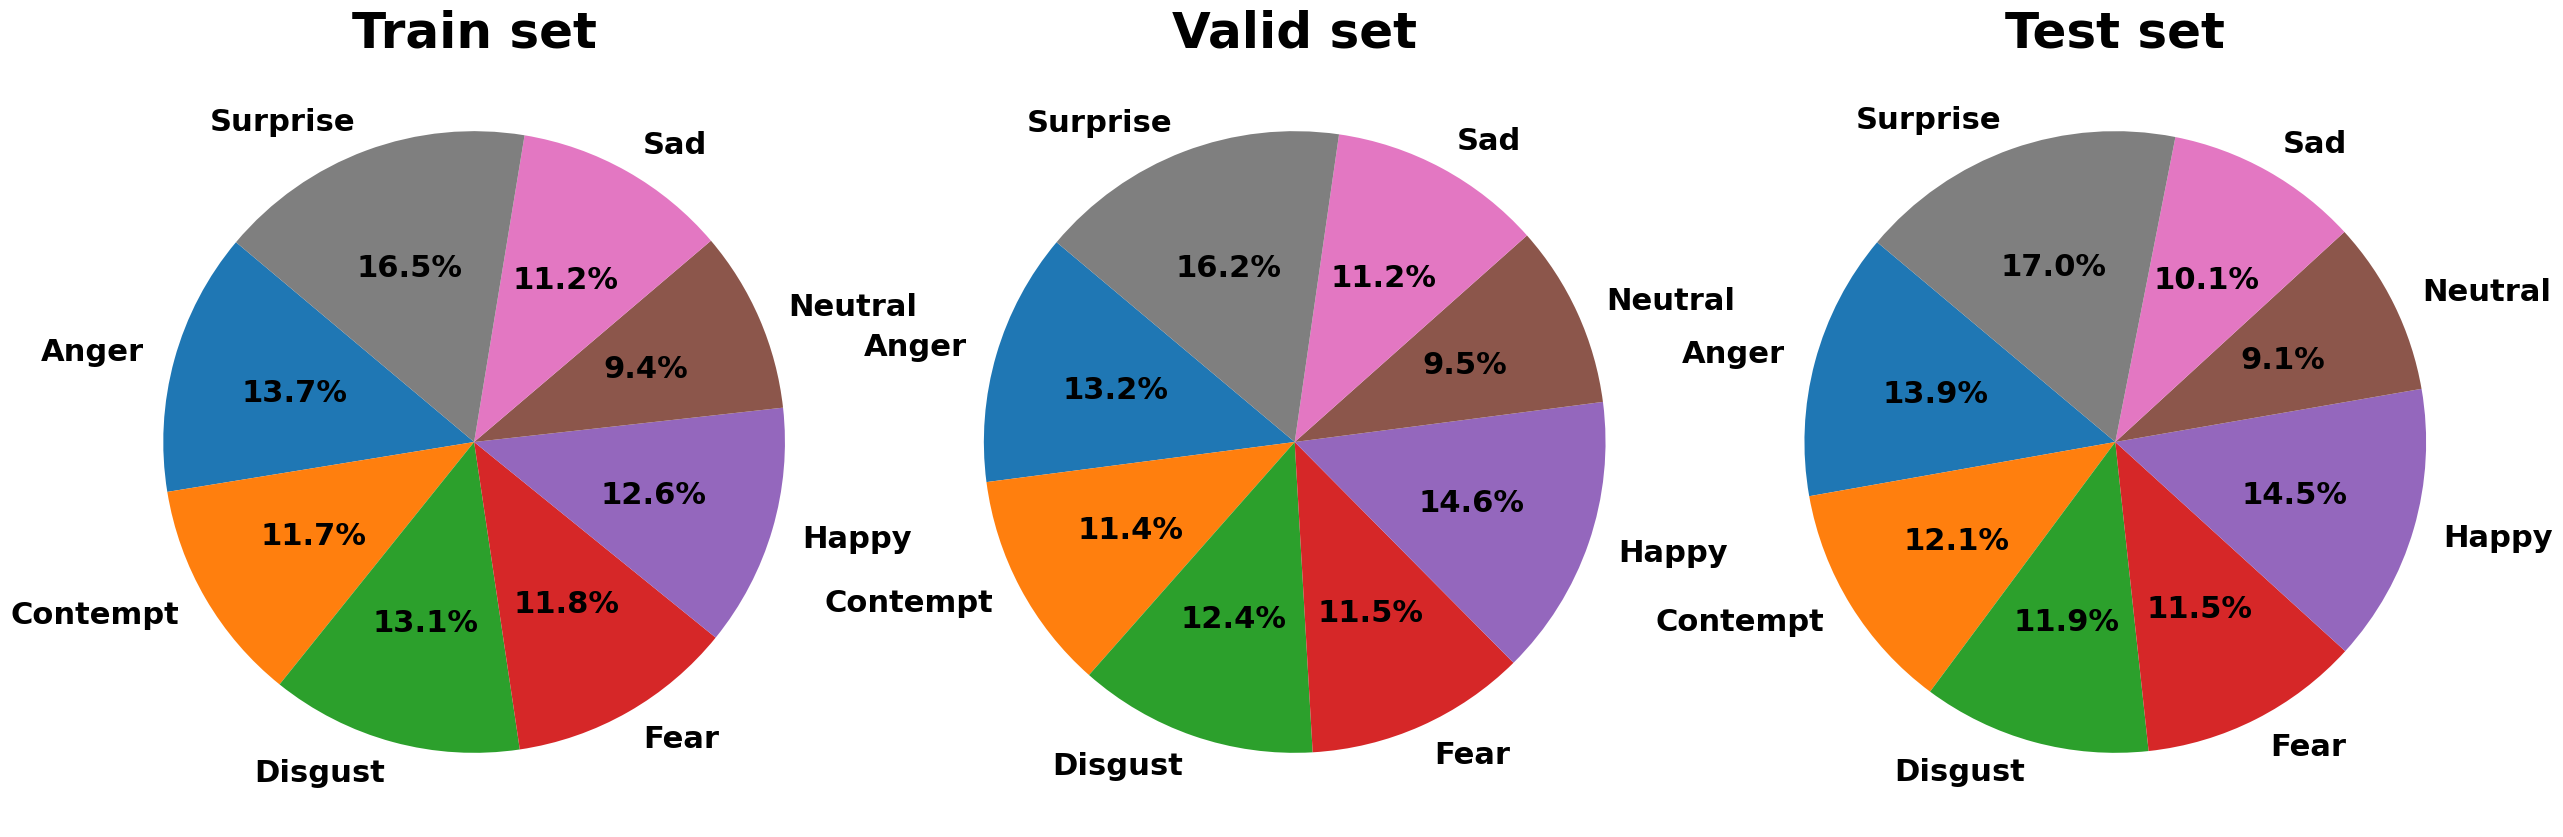

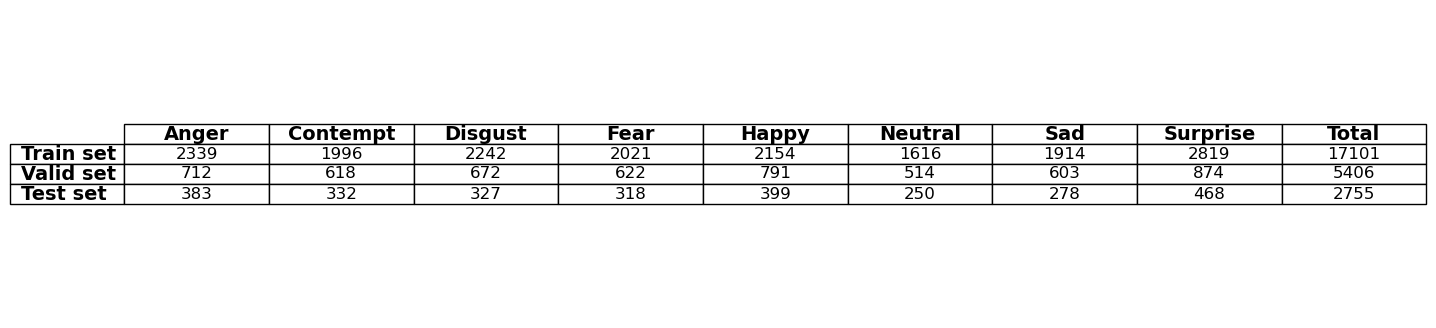

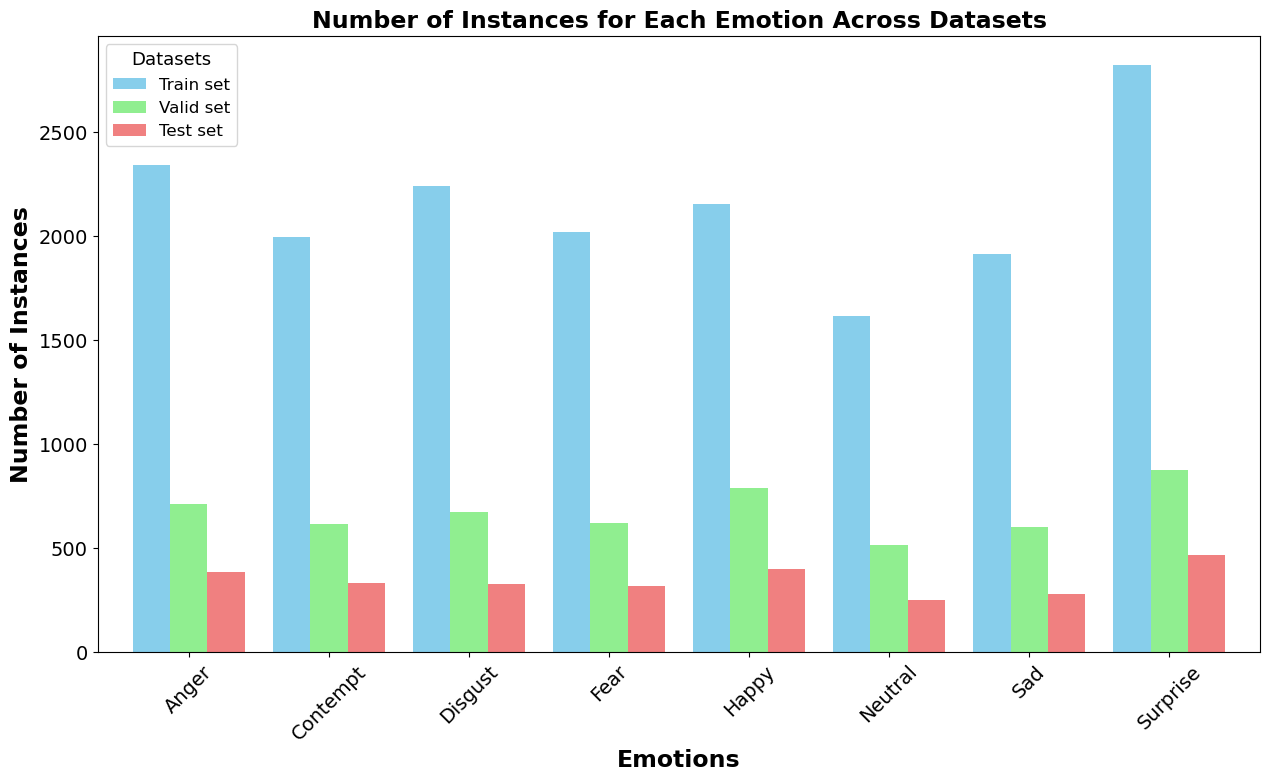

In [3]:
paths = [
    '/Users/piglet/Desktop/Project_Code/YOLO_format/train/labels',
    '/Users/piglet/Desktop/Project_Code/YOLO_format/valid/labels',
    '/Users/piglet/Desktop/Project_Code/YOLO_format/test/labels'
]
dataset_names = ['Train set', 'Valid set', 'Test set']
analyze_yolo_dataset_multiple(paths, dataset_names)